In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
class RidgeRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000, alpha=1):
        self.lr = learning_rate
        self.alpha = alpha
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history= [ ]
        self.w_list = [ ]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initializing the parameters:
        self.weights = np.zeros(n_features)
        self.bias = 0
        eps=10**-10
        
        # Gradient descent:
        
        for _ in range(self.n_iters):
            
            # approximate y with linear combination of weights and x, plus bias:
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients:
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update parameters:
            w_prev = self.weights
            w0_prev = self.bias
            self.weights = self.weights*(1 - self.alpha * self.lr/n_samples) - self.lr * dw
            self.bias -= self.lr * db
            
            # appending cost and w values:
            cost = np.sum(np.square(y- y_predicted)) +  self.alpha*np.sum(np.square(self.weights))
            w=list(self.weights)
            w.append(self.bias)
            self.w_list.append(w)
            self.cost_history.append(cost)
            
            if np.sum(np.square(w_prev-self.bias))<eps:
                break

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        
        return linear_model

    
    def error(self,x_test,y_test):
        y_p = self.predict(x_test)
        return np.sum(np.square(y_p-y_test))

In [6]:
df= pd.read_csv('data1.csv', header= None)
df.head()

,0,1,2
0,1.10500,-2.60510,34.2610
1,0.30463,1.55360,1.1477
2,2.67450,1.17810,15.6260
3,-3.54260,0.79471,-12.7760
4,-0.22632,4.44160,-21.7230


[]

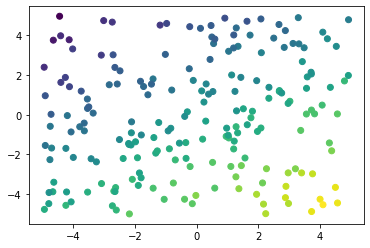

In [8]:
plt.scatter(df[0],df[1],c=df[2])
plt.plot()

In [10]:
X = df[[0,1]]
y = df[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [12]:
from sklearn.model_selection import KFold as kf

In [13]:
k = kf(n_splits=5)
X_train = np.array(X_train)
y_train = np.array(y_train)
lr_range = [10**i for i in range(-5,3)]
for j in lr_range :
    l=[ ]
    for train_index, test_index in k.split(X_train, y_train):
        reg = RidgeRegression(learning_rate=j, n_iters=100)
        reg.fit(X_train[train_index], y_train[train_index])
        y_p = reg.error(X_train[test_index], y_train[test_index])
        l.append(y_p)
    print(f"Learning rate: {j} mean error is : {sum(l)/len(l)}")

Learning rate: 1e-05 mean error is : 16053.576349839295
Learning rate: 0.0001 mean error is : 14346.65714466027
Learning rate: 0.001 mean error is : 5239.842510194481
Learning rate: 0.01 mean error is : 724.2030630699966
Learning rate: 0.1 mean error is : 489.66269001416094
Learning rate: 1 mean error is : 1.0746131375738748e+183
Learning rate: 10 mean error is : inf
Learning rate: 100 mean error is : inf


In [73]:
alpha_range = [i for i in range(70)]
training_error = [ ]
testing_error = [ ]
cost = [ ]
for i in alpha_range:
    model = RidgeRegression(learning_rate=0.3, n_iters = 200, alpha=i)
    model.fit(X_train, y_train)
    training_error.append(model.error(X_train, y_train))
    testing_error.append(model.error(X_test, y_test))

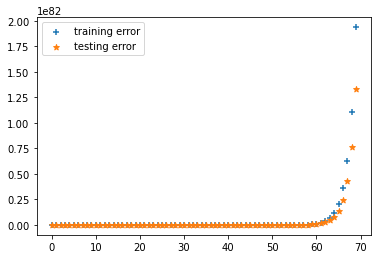

In [79]:
plt.scatter(alpha_range,training_error,marker="+",label="training error")
plt.scatter(alpha_range,testing_error,marker="*",label="testing error")
plt.legend()
plt.show()

In [71]:
model = RidgeRegression(learning_rate=0.3,n_iters=200)
model.fit(X_train,y_train)

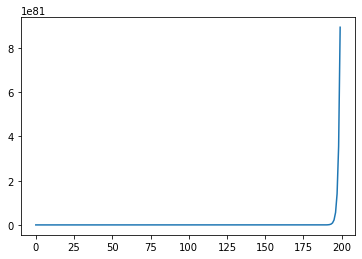

In [80]:
k=list(range(len(model.cost_history)))
plt.plot(k,model.cost_history)
plt.show()

In [65]:
model = RidgeRegression(learning_rate=0.3,n_iters=500)
model.fit(X_train,y_train)

In [67]:
model.weights

array([5.23924578e+77, 3.83462746e+77])

In [68]:
model.bias

-2.986708337331362e+76

In [66]:
model.error(X_test,y_test)

3.1592013326074423e+158

##  Training error and Validation error:

In [82]:
df.insert(0,'A1',1)
df.columns = [0,1,2,3]
df.head()

,0,1,2,3
0,1,1.10500,-2.60510,34.2610
1,1,0.30463,1.55360,1.1477
2,1,2.67450,1.17810,15.6260
3,1,-3.54260,0.79471,-12.7760
4,1,-0.22632,4.44160,-21.7230


In [83]:
X_train1, X_test1 = train_test_split(df, test_size=0.3, random_state=0)

In [90]:
X_train1.shape[1]

4

In [105]:
s = np.logspace(-1,1,10) # between 10^-1 to 10^1 there will be 10 no. (by default base is 10)

training_error = []
validation_error = []

# Identity Matrix:
I = np.zeros((X_train1.shape[1]-1,X_train1.shape[1]-1))
I[1:,1:] = np.eye(X_train1.shape[1]-2) # creating an Identity matrix

for k in s:
    train_err = np.zeros(len(s))
    val_err = np.zeros(len(s))
    for j in range(len(s)):
        train, test = train_test_split(X_train1, test_size=0.3)
        # Training
        X = np.array(train[[0,1,2]])
        y = np.array(train[3])
    
        w = np.linalg.inv(X.T@X+k*I)@X.T@y # w= inverse of(X.T*X + s*I) * (X.T*y)
        
        # Training error
        train_err[j] = ((X@w-y)**2).mean()
        
        # Validation error
        X = np.array(test[[0,1,2]])
        y = np.array(test[3])
        val_err[j]= ((X@w-y)**2).mean()
        
    training_error.append(train_err.mean())
    validation_error.append(val_err.mean())

In [106]:
# Printing Training and Validation error:
print(s)
print('\nTraining error:\n', training_error)
print('\nValidation error:\n', validation_error)

[ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]

Training error:
 [15.549285148240534, 16.046961817147974, 15.640737695987212, 15.415666944907054, 15.861039488358932, 15.723307245783806, 15.80668950715967, 15.775693732391511, 15.778298729706766, 15.91613502671998]

Validation error:
 [17.357146924610067, 15.840734258717745, 17.059948214226466, 17.293084691465463, 16.35691966383616, 16.750674175841688, 16.353758927014844, 16.521120901400522, 16.855833486211612, 16.556727363927717]


In [109]:
print('Parameters are:\t', w)

Parameters are:	 [ 7.89225293  4.86343317 -6.82371888]


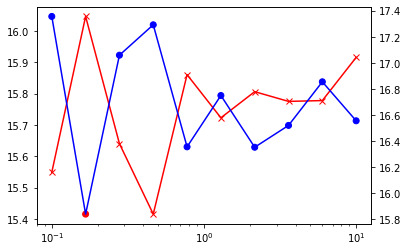

In [112]:
ax1= plt.figure().gca()

vmin = np.min(validation_error)
mask = validation_error == vmin # make array with Vmin value as True other as Flase.
color = np.where(mask, 'red', 'blue')

ax1.plot(s,training_error,"rx-")
ax1.set_xscale("log")

ax2 = ax1.twinx()
ax2.plot(s,validation_error,"b-")
ax2.scatter(s,validation_error,color=color)
ax2.set_xscale("log")

plt.show()

## Hyperplane:

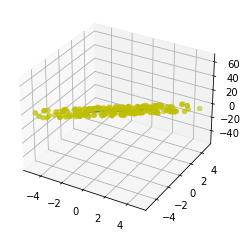

In [129]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
np.random.shuffle(x2)
X1,X2 = np.meshgrid(x1,x2)

f = (w[0] + w[1]*X1 + w[2]*X2)

ax = plt.figure().gca(projection="3d")
ax.scatter3D(df[1],df[2],df[3],c="y")
ax.plot_surface(X1,X2,f,alpha=1,shade=False)
plt.show()